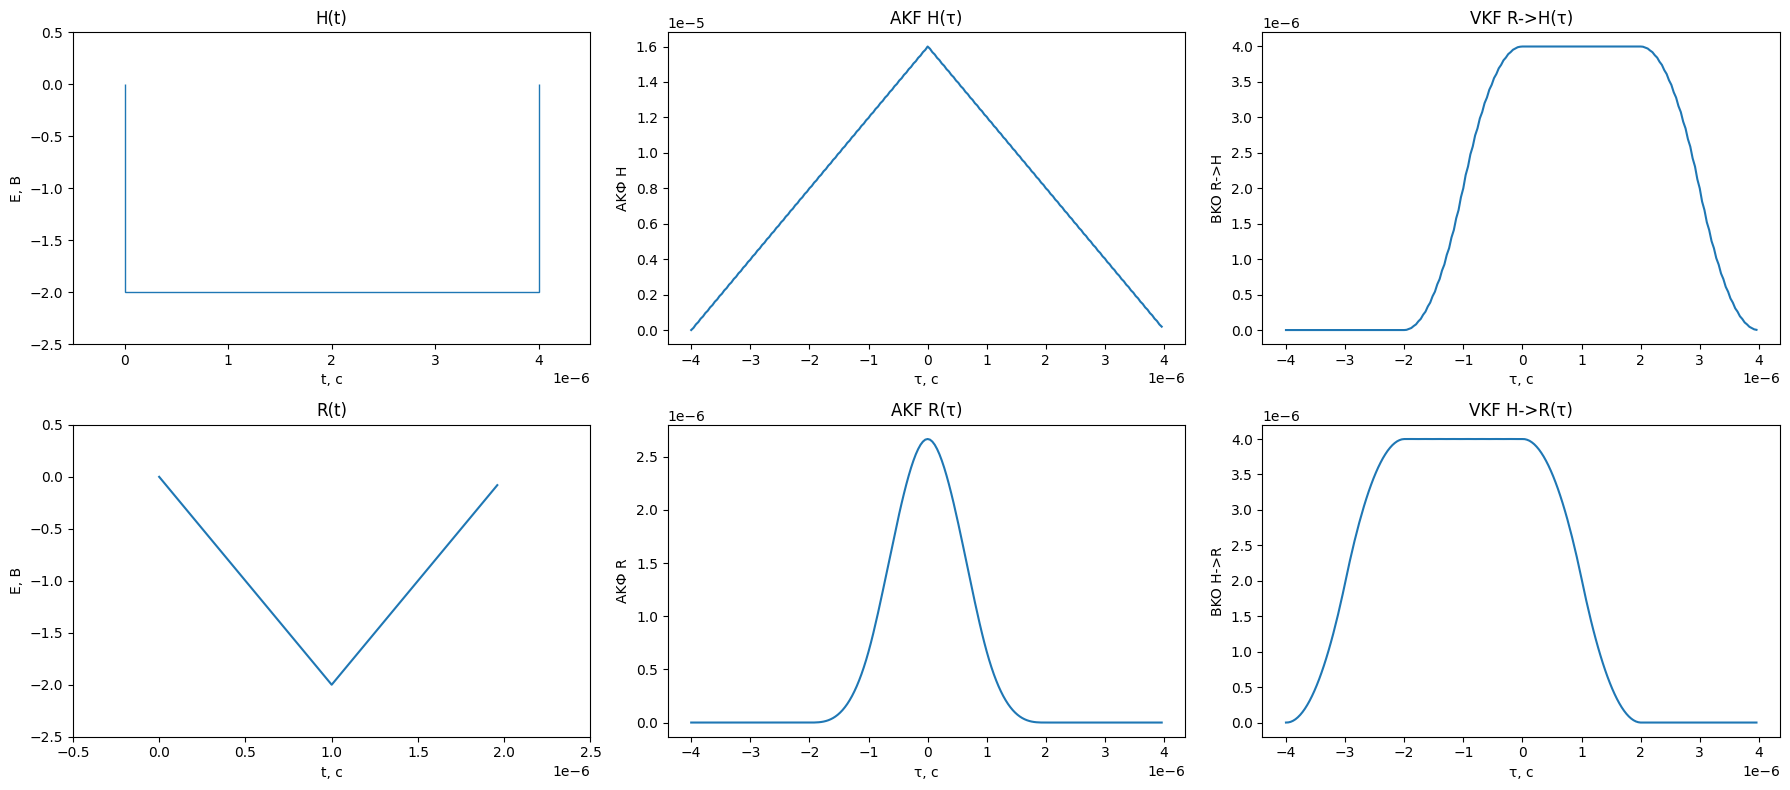

In [4]:
import matplotlib.pyplot as plt

# Параметры сигналов
t_i_H = 4e-6  # Длительность сигнала H
t_i_R = 2e-6  # Длительность сигнала R
E_min = -2     # Минимальное значение амплитуды

# Функция H(t) - прямоугольный импульс
def H(t):
    return E_min if 0 <= t <= t_i_H else 0

# Функция R(t) - треугольный импульс
def R(t):
    if t < 0 or t > t_i_R:
        return 0
    if t <= t_i_R/2:
        return (2*E_min/t_i_R) * t
    else:
        return 2*E_min - (2*E_min/t_i_R) * t

# Генерация данных для H(t)
edges_H = [0, t_i_H]
values_H = [E_min]

# Генерация данных для R(t) без артефактов
step_R = t_i_R / 100
chart_R = []
t_val = 0.0
while t_val <= t_i_R:
    chart_R.append((t_val, R(t_val)))
    t_val += step_R
chart_R = chart_R[:-1]  # Удаление последней точки

# Генерация данных для корреляционных функций
t_i = max(t_i_H, t_i_R)  # Общая длительность для расчетов
a = -t_i * 2
b = t_i * 2
step_integral = (b - a) / 1000

# Расчет AKF H(t)
chart_akf_H_tau = []
tau_val = -t_i
step_tau = t_i / 100
while tau_val <= t_i:
    y = 0.0
    i = a
    while i <= b:
        val = H(i)*H(i + tau_val)
        y += val if (abs(i-a)<1e-14 or abs(i-b)<1e-14) else 2*val
        i += step_integral
    y *= (step_integral / 2)
    chart_akf_H_tau.append((tau_val, y))
    tau_val += step_tau

# Расчет AKF R(t)
chart_akf_R_tau = []
tau_val = -t_i
while tau_val <= t_i:
    y = 0.0
    i = a
    while i <= b:
        val = R(i)*R(i + tau_val)
        y += val if (abs(i-a)<1e-14 or abs(i-b)<1e-14) else 2*val
        i += step_integral
    y *= (step_integral / 2)
    chart_akf_R_tau.append((tau_val, y))
    tau_val += step_tau

# Расчет VKF R->H
chart_vkf_R_H_tau = []
tau_val = -t_i
while tau_val <= t_i:
    y = 0.0
    i = a
    while i <= b:
        val = R(i)*H(i + tau_val)
        y += val if (abs(i-a)<1e-14 or abs(i-b)<1e-14) else 2*val
        i += step_integral
    y *= (step_integral / 2)
    chart_vkf_R_H_tau.append((tau_val, y))
    tau_val += step_tau

# Расчет VKF H->R
chart_vkf_H_R_tau = []
tau_val = -t_i
while tau_val <= t_i:
    y = 0.0
    i = a
    while i <= b:
        val = H(i)*R(i + tau_val)
        y += val if (abs(i-a)<1e-14 or abs(i-b)<1e-14) else 2*val
        i += step_integral
    y *= (step_integral / 2)
    chart_vkf_H_R_tau.append((tau_val, y))
    tau_val += step_tau

# Построение графиков
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))

# H(t)
axs[0,0].stairs(values_H, edges=edges_H, baseline=0, fill=False)
axs[0,0].set_title("H(t)")
axs[0,0].set_xlabel("t, c")
axs[0,0].set_ylabel("E, B")
axs[0,0].set_xlim(-0.5e-6, 4.5e-6)
axs[0,0].set_ylim(-2.5, 0.5)

# AKF H(τ)
axs[0,1].plot(*zip(*chart_akf_H_tau))
axs[0,1].set_title("AKF H(τ)")
axs[0,1].set_xlabel("τ, c")
axs[0,1].set_ylabel("AKФ H")

# VKF R->H(τ)
axs[0,2].plot(*zip(*chart_vkf_R_H_tau))
axs[0,2].set_title("VKF R->H(τ)")
axs[0,2].set_xlabel("τ, c")
axs[0,2].set_ylabel("BKO R->H")

# R(t)
x_R, y_R = zip(*chart_R)
axs[1,0].plot(x_R, y_R)
axs[1,0].set_title("R(t)")
axs[1,0].set_xlabel("t, c")
axs[1,0].set_ylabel("E, B")
axs[1,0].set_xlim(-0.5e-6, 2.5e-6)
axs[1,0].set_ylim(-2.5, 0.5)

# AKF R(τ)
axs[1,1].plot(*zip(*chart_akf_R_tau))
axs[1,1].set_title("AKF R(τ)")
axs[1,1].set_xlabel("τ, c")
axs[1,1].set_ylabel("AKФ R")

# VKF H->R(τ)
axs[1,2].plot(*zip(*chart_vkf_H_R_tau))
axs[1,2].set_title("VKF H->R(τ)")
axs[1,2].set_xlabel("τ, c")
axs[1,2].set_ylabel("BKO H->R")

plt.tight_layout()
plt.show()
